## HousePrice Prediction using ANN

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

#### Importing Dataset from Sci-kit Learn

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=50)

#### Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [10]:
np.random.seed(50)
tf.random.set_seed(50)

In [11]:
X_train.shape

(11610, 8)

In [12]:
X_test.shape

(5160, 8)

In [13]:
X_valid.shape

(3870, 8)

#### Creating Structure of Regression ANN Model

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


#### Compiling the Model

In [16]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [17]:
model_history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 3s 6ms/step - loss: 2.4668 - mae: 1.1787 - val_loss: 0.8854 - val_mae: 0.6934
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7905 - mae: 0.6486 - val_loss: 0.6870 - val_mae: 0.6154
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6314 - mae: 0.5828 - val_loss: 0.6258 - val_mae: 0.5819
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5558 - mae: 0.5407 - val_loss: 0.5874 - val_mae: 0.5636
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5324 - mae: 0.5256 - val_loss: 0.5578 - val_mae: 0.5480
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5214 - mae: 0.5132 - val_loss: 0.5359 - val_mae: 0.5365
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4771 - mae: 0.5000 - val_loss: 0.5180 - val_mae: 0.5235
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [18]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4112 - mae: 0.4498


In [19]:
model_history.history

{'loss': [1.740788459777832,
  0.716242790222168,
  0.6063259243965149,
  0.5536723732948303,
  0.5169718265533447,
  0.48886415362358093,
  0.4670681059360504,
  0.45017147064208984,
  0.4369259774684906,
  0.4262019991874695,
  0.4178534746170044,
  0.4111509323120117,
  0.4053761065006256,
  0.40049922466278076,
  0.39623433351516724,
  0.3926011323928833,
  0.38929426670074463,
  0.3863607943058014,
  0.38355526328086853,
  0.3811274766921997,
  0.379117488861084,
  0.37684011459350586,
  0.3751499354839325,
  0.37326541543006897,
  0.3715851306915283,
  0.37031349539756775,
  0.3687596619129181,
  0.3673063814640045,
  0.3662206530570984,
  0.36517444252967834,
  0.3640305697917938,
  0.36276429891586304,
  0.3619367778301239,
  0.3608644902706146,
  0.3598482310771942,
  0.3588029742240906,
  0.35823047161102295,
  0.35733431577682495,
  0.35637637972831726,
  0.3556689918041229,
  0.3549104928970337,
  0.35418614745140076,
  0.35369157791137695,
  0.35294145345687866,
  0.352084

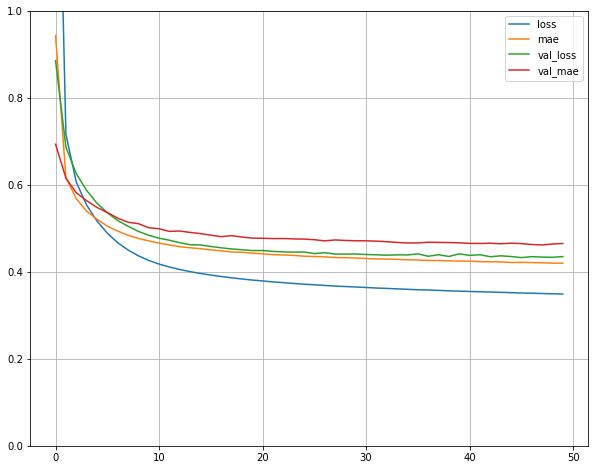

In [20]:
pd.DataFrame(model_history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
X_new = X_test[:3]

In [23]:
y_pred = model.predict(X_new)

In [24]:
print(y_pred)

[[1.8415449]
 [2.810821 ]
 [1.8010509]]


In [25]:
print(y_test[:3])

[1.963 2.75  1.275]
